# Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# İmport ve Setting İşlemleri

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, RocCurveDisplay #plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.exceptions import ConvergenceWarning

from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x:  "%.4f" % x)

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706
4,32,male,28.8800,0,no,northwest,3866.8552


# Verinin Analiz Edilmesi

In [ ]:
# Verideki değişkenlerin analizi
def grab_col_names(dataframe, cat_th=10, car_th=20):
  """
  *******
  Parametreler
  ------
    dataframe : dataframe
       Değişken isimleri alınmak istenen DataFrame'dir.

    cat_th :  int / float
        Numerik fakat kategorik olan değişkenler için sınıf eşiği

    car_th : int / float
      Kategorik fakat kardinal olan değişkenler için sınıf eşiği


  Returns
   ------
    cath_cols : list
         Kategorik değişken listesi
    num_cols : list
        Numerik değişken listesi
    cat_but_car :
        Kategorik gözüken fakat kardinal olan değişken listesi


  Notes :
  -----
    cath_cols + num_cols + cat_but_car = Toplam Değişken Sayısı
    -----------
    """
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if
                 dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]


  print(f"Obervations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Obervations: 1338
# Variables: 7
# cat_cols: 4
# num_cols: 3
# cat_but_car: 0
# num_but_cat: 1

Obervations: 1338
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [ ]:
# Veriye bakış
def check_df(dataframe, head=5):
  print("######### SHAPE ###########")
  print(dataframe.shape)
  print("######## Types #######")
  print(dataframe.dtypes)
  print("######## HEAD #########")
  print(dataframe.head(head))
  print("######### TAİL ########")
  print(dataframe.tail(head))
  print("######## Boş Değerler #####")
  print(dataframe.isnull().sum())

check_df(df)

######### SHAPE ###########
(1338, 7)
######## Types #######
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
######## HEAD #########
   age     sex     bmi  children smoker     region    charges
0   19  female 27.9000         0    yes  southwest 16884.9240
1   18    male 33.7700         1     no  southeast  1725.5523
2   28    male 33.0000         3     no  southeast  4449.4620
3   33    male 22.7050         0     no  northwest 21984.4706
4   32    male 28.8800         0     no  northwest  3866.8552
######### TAİL ########
      age     sex     bmi  children smoker     region    charges
1333   50    male 30.9700         3     no  northwest 10600.5483
1334   18  female 31.9200         0     no  northeast  2205.9808
1335   18  female 36.8500         0     no  southeast  1629.8335
1336   21  female 25.8000         0     no  southwest  2007.9450
1337   61  female 29.0700         0    y

# Veri Analizinin Görselleştirilmesi

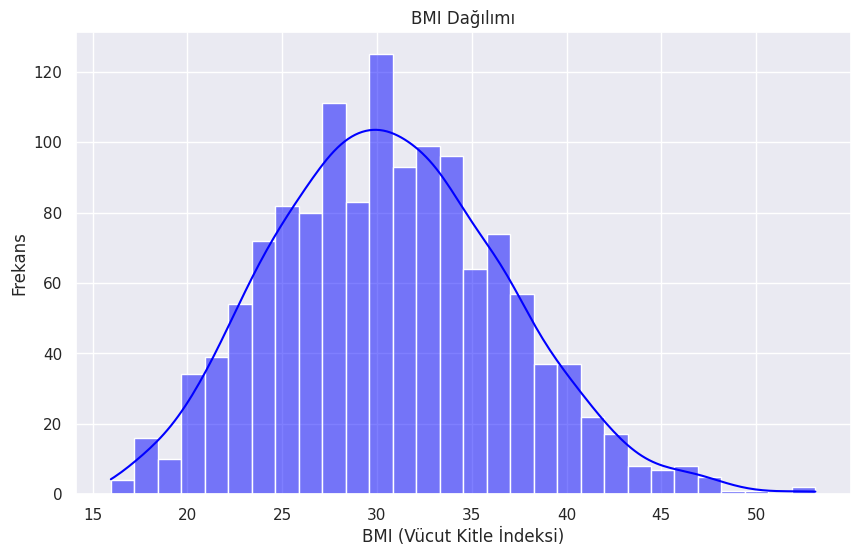

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='blue')
plt.title('BMI Dağılımı')
plt.xlabel('BMI (Vücut Kitle İndeksi)')
plt.ylabel('Frekans')
plt.show()

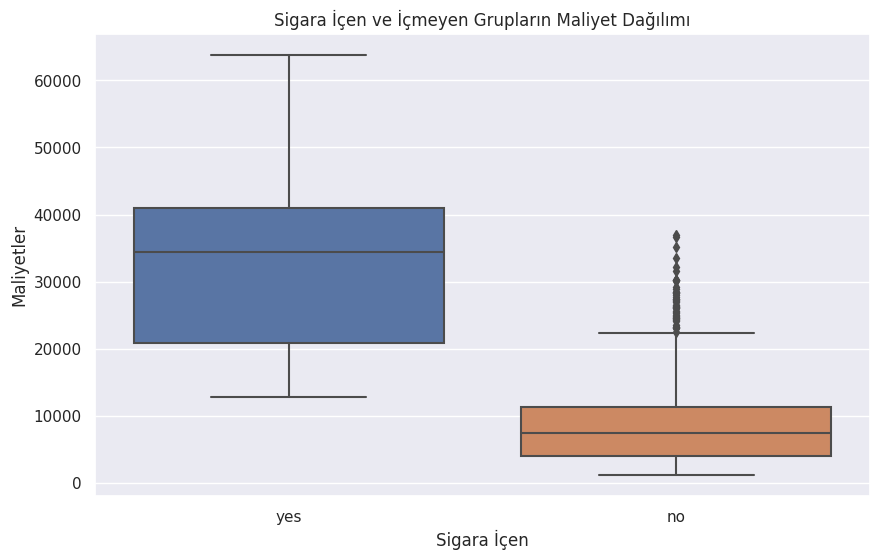

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Sigara İçen ve İçmeyen Grupların Maliyet Dağılımı')
plt.xlabel('Sigara İçen')
plt.ylabel('Maliyetler')
plt.show()

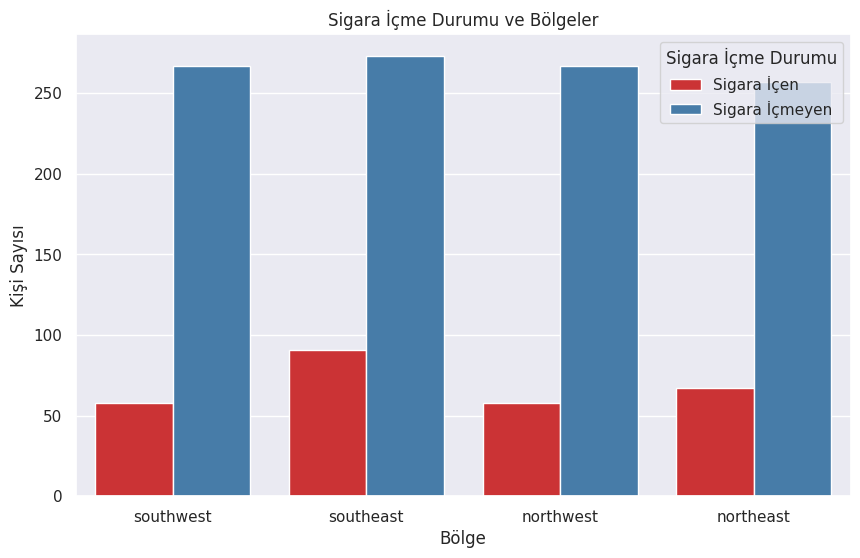

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='smoker', palette='Set1')
plt.title('Sigara İçme Durumu ve Bölgeler')
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Sigara İçme Durumu', labels=['Sigara İçen', 'Sigara İçmeyen'])
plt.show()

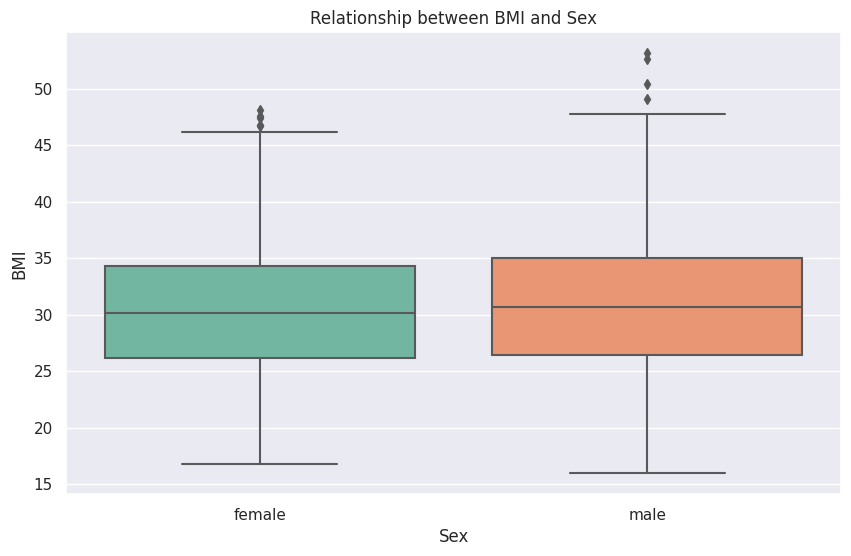

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='bmi', palette='Set2')
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

In [ ]:
print(f"En fazla çocuk bulunan bölge {df.groupby('region')['children'].sum().max()} çocuk ile {df.groupby('region')['children'].sum().idxmax().upper()}  dir.")

# En fazla çocuk bulunan bölge 382 çocuk ile SOUTHEAST  dir.

En fazla çocuk bulunan bölge 382 çocuk ile SOUTHEAST  dir.


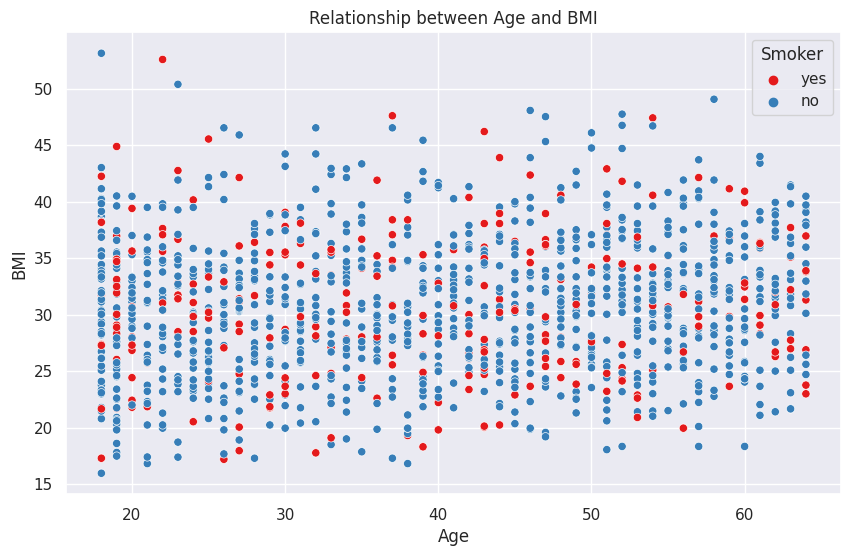

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', palette='Set1')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

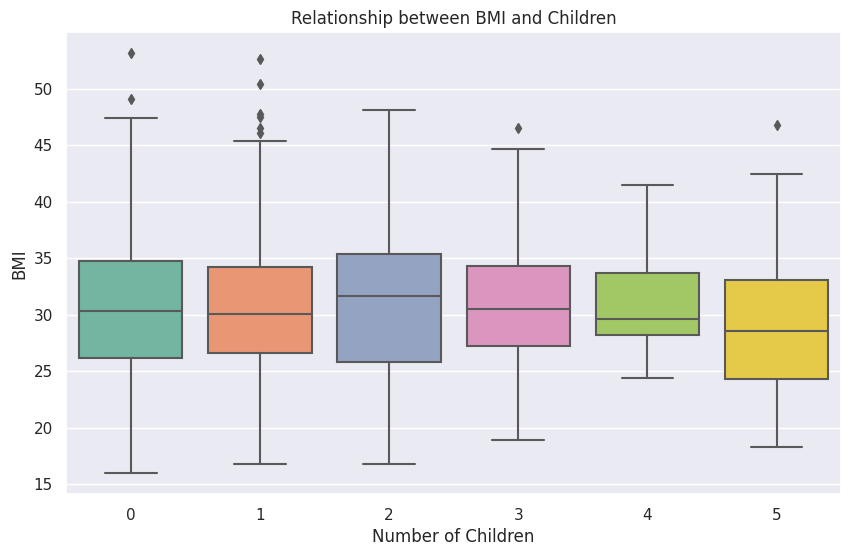

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='children', y='bmi', palette='Set2')
plt.title('Relationship between BMI and Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Kategorik Değişken Analizi
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                      "Ratio" : 100* dataframe[col_name].value_counts() / len(dataframe)}))
  print("###########################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)

        sex   Ratio
male    676 50.5232
female  662 49.4768
###########################
sex None
     smoker   Ratio
no     1064 79.5217
yes     274 20.4783
###########################
smoker None
           region   Ratio
southeast     364 27.2048
southwest     325 24.2900
northwest     325 24.2900
northeast     324 24.2152
###########################
region None
   children   Ratio
0       574 42.8999
1       324 24.2152
2       240 17.9372
3       157 11.7339
4        25  1.8685
5        18  1.3453
###########################
children None


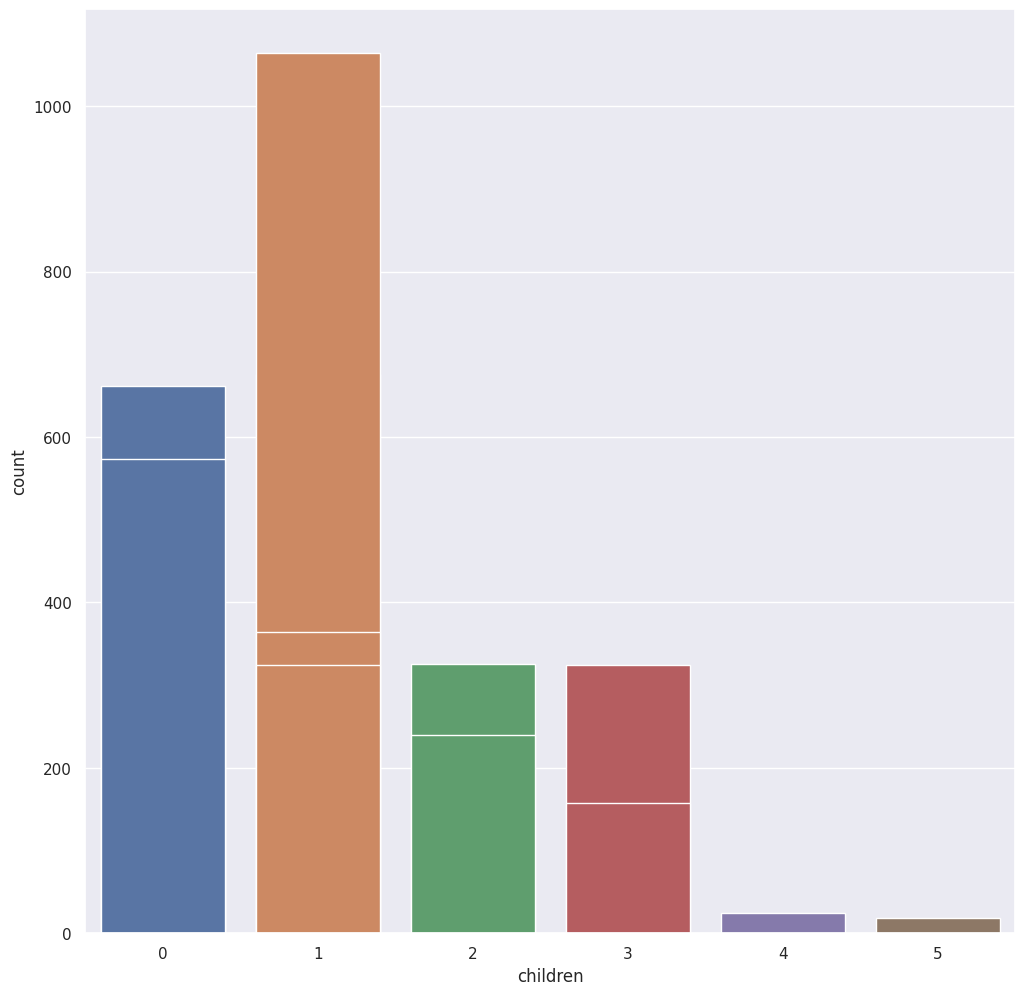

In [ ]:
for col in cat_cols:
  print(col, cat_summary(df, col, True))

In [ ]:
#Numerik Değişken Analizi
def num_summary(dataframe, num_cols, plot=False):
  quantiles = [0.05, 0.10, 0.25, 0.50, 0.60, 0.75, 0.90, 0.95, 0.99]
  print(dataframe[num_cols].describe(quantiles).T)


  if plot:
    dataframe[num_cols].hist(bins=20)
    plt.xlabel(num_cols)
    plt.title(num_cols)
    plt.show()

count   1338.0000
mean      39.2070
std       14.0500
min       18.0000
5%        18.0000
10%       19.0000
25%       27.0000
50%       39.0000
60%       44.0000
75%       51.0000
90%       59.0000
95%       62.0000
99%       64.0000
max       64.0000
Name: age, dtype: float64


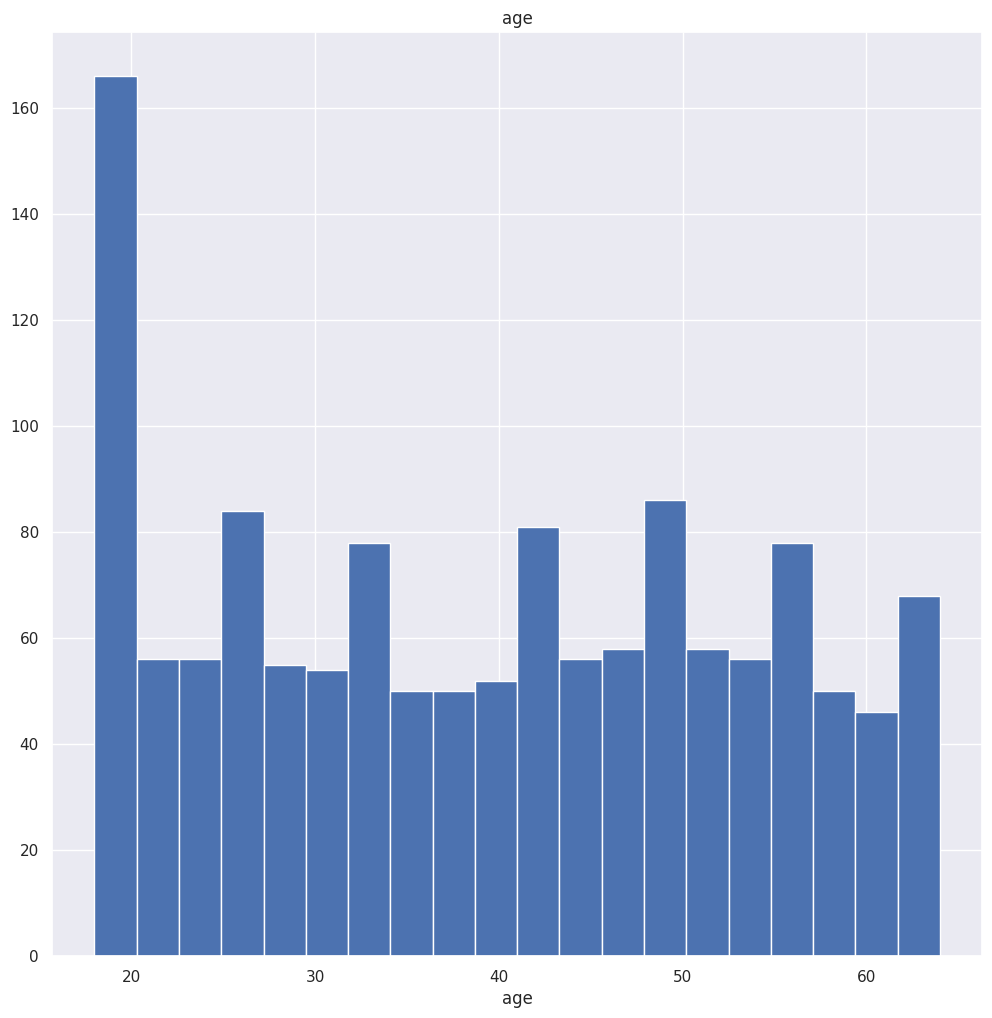

age None
count   1338.0000
mean      30.6634
std        6.0982
min       15.9600
5%        21.2560
10%       22.9900
25%       26.2963
50%       30.4000
60%       32.0320
75%       34.6938
90%       38.6195
95%       41.1060
99%       46.4079
max       53.1300
Name: bmi, dtype: float64


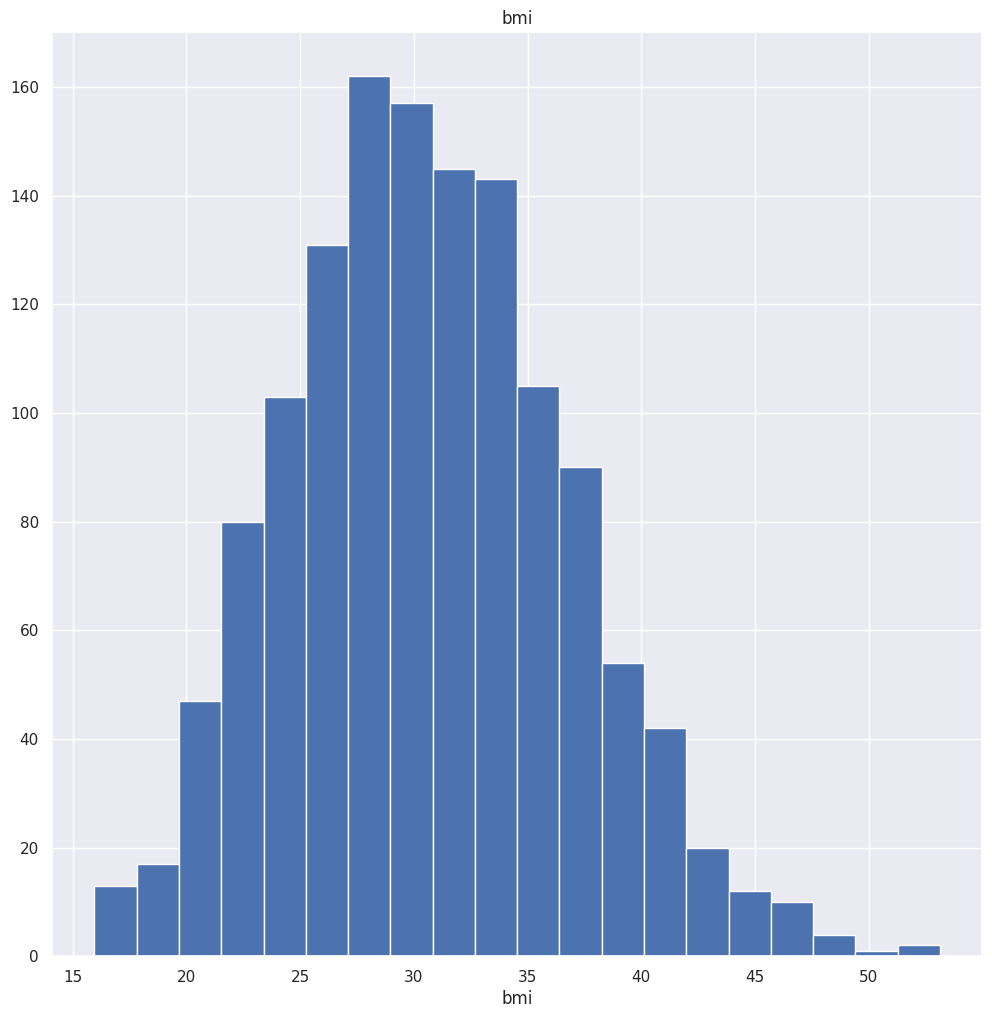

bmi None
count    1338.0000
mean    13270.4223
std     12110.0112
min      1121.8739
5%       1757.7534
10%      2346.5336
25%      4740.2872
50%      9382.0330
60%     11399.8572
75%     16639.9125
90%     34831.7197
95%     41181.8278
99%     48537.4807
max     63770.4280
Name: charges, dtype: float64


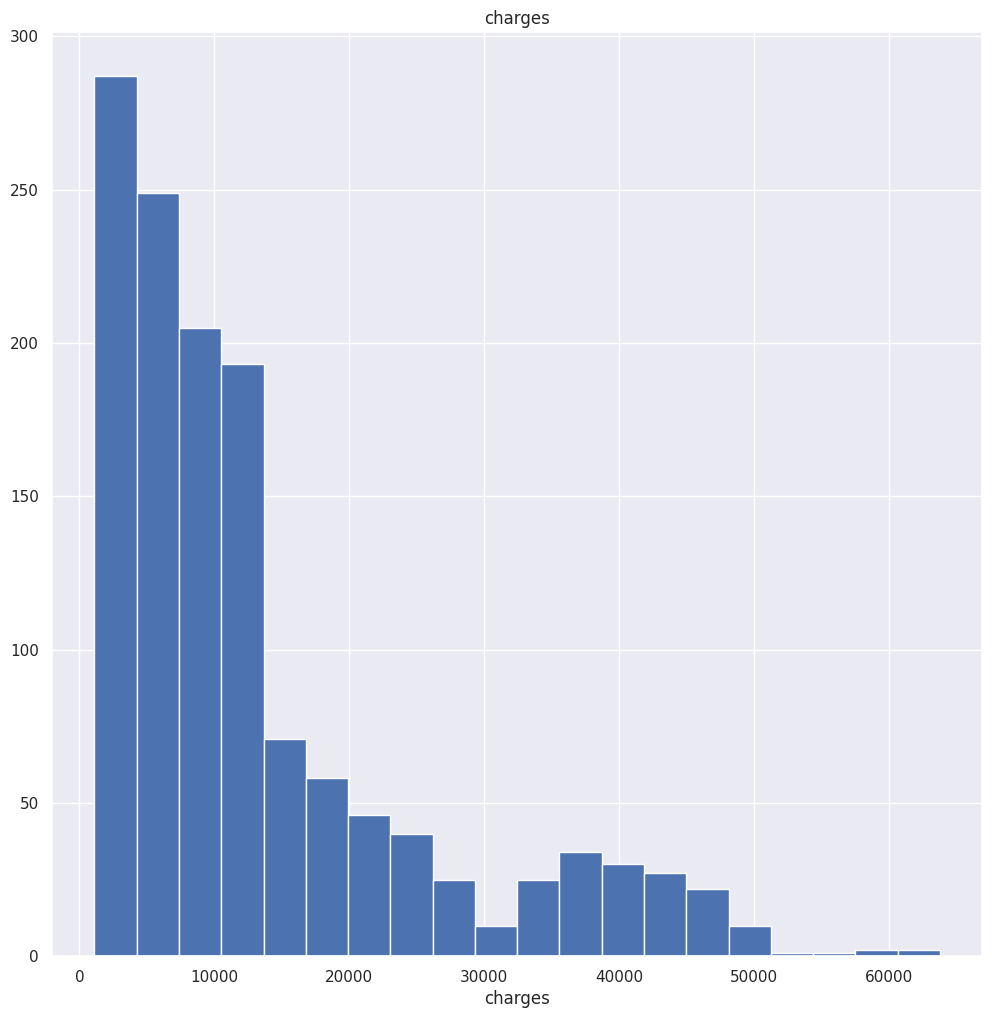

charges None


In [ ]:
for col in num_cols:
  print(col, num_summary(df, col, True))

In [ ]:
# Hedef değişken kırılımında numerik değişkenlerin analizi
def target_summary_with_num(dataframe, target, num_cols):
  print(dataframe.groupby(target).agg({num_cols : "mean"}), end="\n\n\n")

In [ ]:
# Hedef değişken kırılımında kategorik değişkenlerin analizi
def target_summary_with_cat(dataframe, target, cat_cols):
  print(pd.DataFrame({"Target_Mean": dataframe.groupby(cat_cols)[target].mean()}), end="\n\n\n")

In [ ]:
for col in cat_cols:
  target_summary_with_cat(df, "charges", col)


        Target_Mean
sex                
female   12569.5788
male     13956.7512


        Target_Mean
smoker             
no        8434.2683
yes      32050.2318


           Target_Mean
region                
northeast   13406.3845
northwest   12417.5754
southeast   14735.4114
southwest   12346.9374


          Target_Mean
children             
0          12365.9756
1          12731.1718
2          15073.5637
3          15355.3184
4          13850.6563
5           8786.0352




<Axes: >

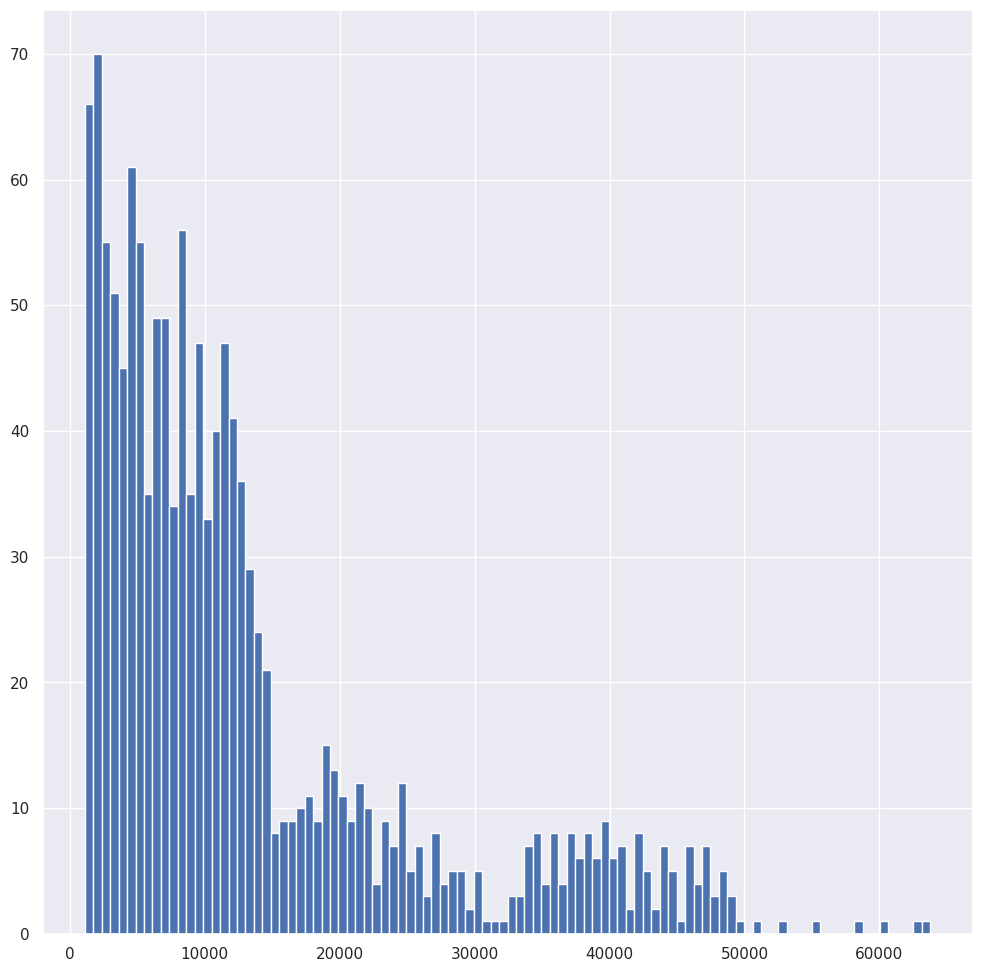

In [ ]:
# Bağımlı Değişkenin Analizi

df["charges"].hist(bins=100)

<Axes: >

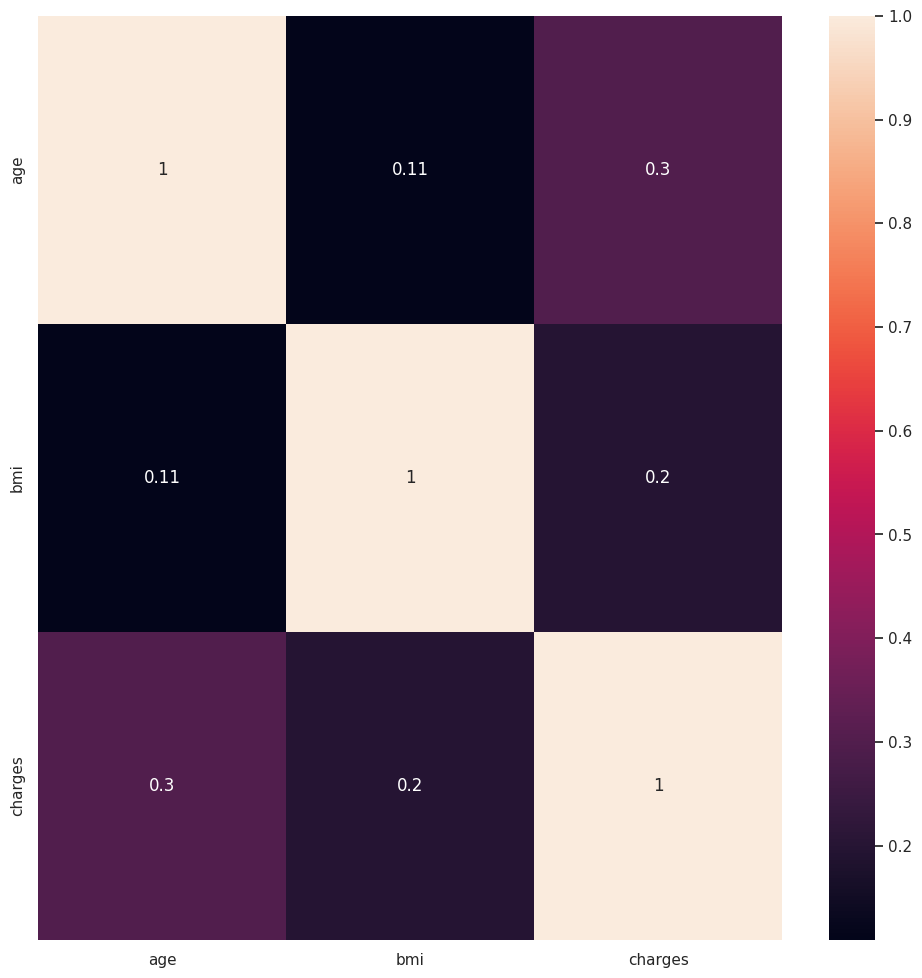

In [ ]:
# Numerik Değişkenlerin Korelasyon Analizi
corr = df[num_cols].corr()
sns.set(rc={"figure.figsize" : (12,12)})
sns.heatmap(corr, annot=True)

In [ ]:
# Eşik Değerlerini Belirleyen Fonksiyon
def outlier_treshold(dataframe, col_name, q1=0.05, q3=0.95):
  quantile1 = dataframe[col_name].quantile(q1)
  quantile3 = dataframe[col_name].quantile(q3)
  ıqr = quantile3 - quantile1
  up_limit = quantile3 + 1.5 * ıqr
  low_limit = quantile1 - 1.5 * ıqr
  return low_limit, up_limit

In [ ]:
# Aykırı Değerin var olup olmamasını kontrol eden fonksiyon
def check_outlier(dataframe, col_name):
  low, up = outlier_treshold(dataframe, col_name)

  if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low) ].any(axis=None):
    return True
  else :
    return False

In [ ]:
 for col in num_cols:
  print(col, check_outlier(df, col))

# Yapılan analiz sonucu herhangi bir aykırı değere rastlanmamıştır.

# age False
# bmi False
# charges False

age False
bmi False
charges False


# Özellik Mühendisliği

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706
4,32,male,28.8800,0,no,northwest,3866.8552


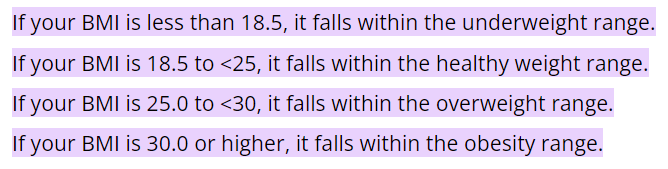

In [ ]:
df["New_BMI"] = pd.cut(x=df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels = ["Underweight", "Healthy", "Overweight", "Obesity"])

In [ ]:

# BMI ve yaşa göre yeni bir değişken oluşturuyoruz
conditions = [
    (df["bmi"] < 18.5) & (df["age"] < 18),  # Underweight and young
    (df["bmi"] < 18.5) & (df["age"] >= 18) & (df["age"] < 50),  # Underweight and mature
    (df["bmi"] < 18.5) & (df["age"] >= 50),  # Underweight and senior
    (df["bmi"] >= 18.5) & (df["bmi"] < 25) & (df["age"] < 18),  # Healthy and young
    (df["bmi"] >= 18.5) & (df["bmi"] < 25) & (df["age"] >= 18) & (df["age"] < 50),  # Healthy and mature
    (df["bmi"] >= 18.5) & (df["bmi"] < 25) & (df["age"] >= 50),  # Healthy and senior
    (df["bmi"] >= 25) & (df["bmi"] < 30) & (df["age"] < 18),  # Overweight and young
    (df["bmi"] >= 25) & (df["bmi"] < 30) & (df["age"] >= 18) & (df["age"] < 50),  # Overweight and mature
    (df["bmi"] >= 25) & (df["bmi"] < 30) & (df["age"] >= 50),  # Overweight and senior
    (df["bmi"] >= 30) & (df["age"] < 18),  # Obesity and young
    (df["bmi"] >= 30) & (df["age"] >= 18) & (df["age"] < 50),  # Obesity and mature
    (df["bmi"] >= 30) & (df["age"] >= 50)  # Obesity and senior
]

choices = [
    "Underweight and young",
    "Underweight and mature",
    "Underweight and senior",
    "Healthy and young",
    "Healthy and mature",
    "Healthy and senior",
    "Overweight and young",
    "Overweight and mature",
    "Overweight and senior",
    "Obesity and young",
    "Obesity and mature",
    "Obesity and senior"
]

df["New_Age_and_BMI"] = np.select(conditions, choices)




In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,New_BMI,New_Age_and_BMI
0,19,female,27.9000,0,yes,southwest,16884.9240,Overweight,Overweight and mature
1,18,male,33.7700,1,no,southeast,1725.5523,Obesity,Obesity and mature
2,28,male,33.0000,3,no,southeast,4449.4620,Obesity,Obesity and mature
3,33,male,22.7050,0,no,northwest,21984.4706,Healthy,Healthy and mature
4,32,male,28.8800,0,no,northwest,3866.8552,Overweight,Overweight and mature
5,31,female,25.7400,0,no,southeast,3756.6216,Overweight,Overweight and mature
6,46,female,33.4400,1,no,southeast,8240.5896,Obesity,Obesity and mature
7,37,female,27.7400,3,no,northwest,7281.5056,Overweight,Overweight and mature
8,37,male,29.8300,2,no,northeast,6406.4107,Overweight,Overweight and mature
9,60,female,25.8400,0,no,northwest,28923.1369,Overweight,Overweight and senior


In [ ]:
df.New_Age_and_BMI.value_counts()

# Obesity and mature        473
# Overweight and mature     288
# Obesity and senior        234
# Healthy and mature        176
# Overweight and senior      98
# Healthy and senior         49
# Underweight and mature     16
# Underweight and senior      4

Obesity and mature        473
Overweight and mature     288
Obesity and senior        234
Healthy and mature        176
Overweight and senior      98
Healthy and senior         49
Underweight and mature     16
Underweight and senior      4
Name: New_Age_and_BMI, dtype: int64

<Axes: ylabel='New_Age_and_BMI'>

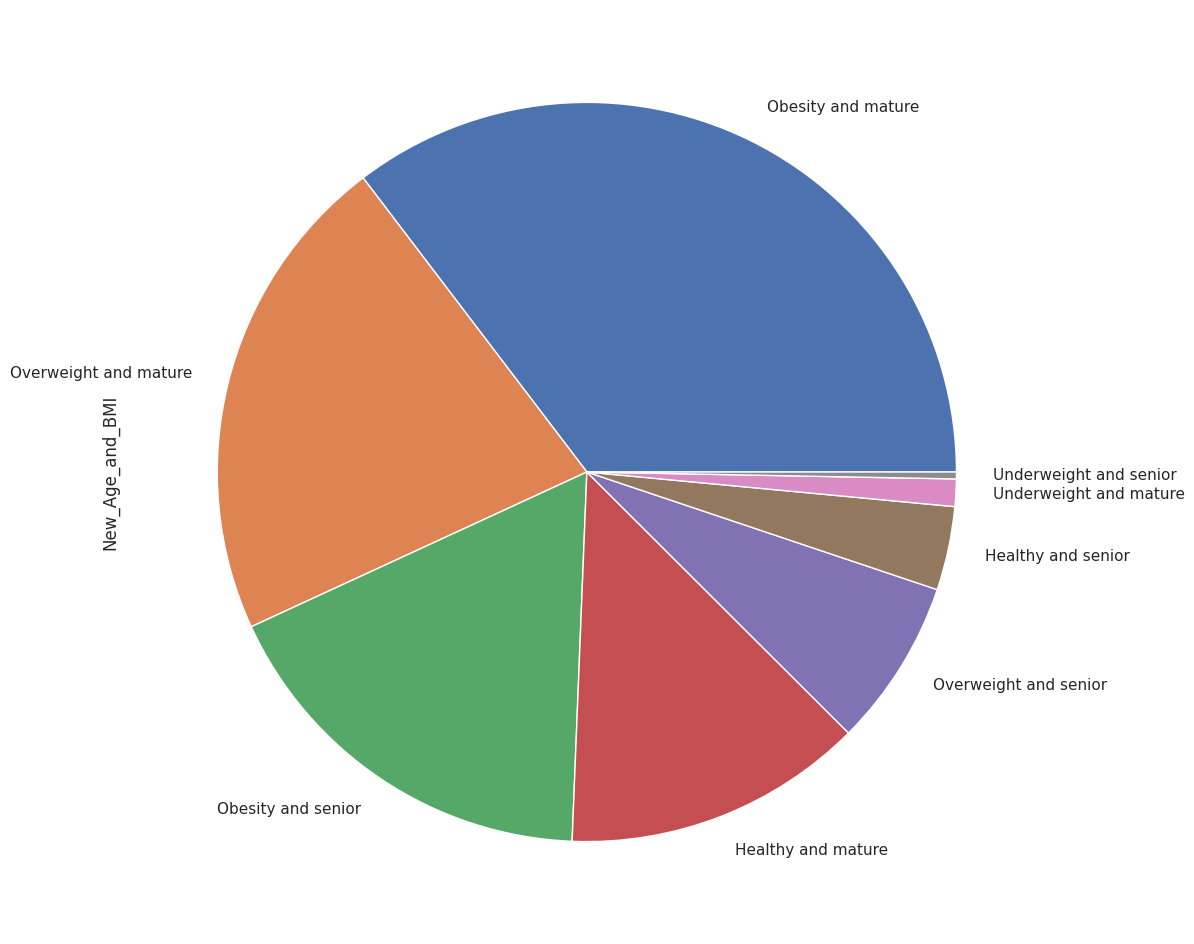

In [ ]:
# Yaş ve BMI göre Dağılım
df.New_Age_and_BMI.value_counts().plot.pie()

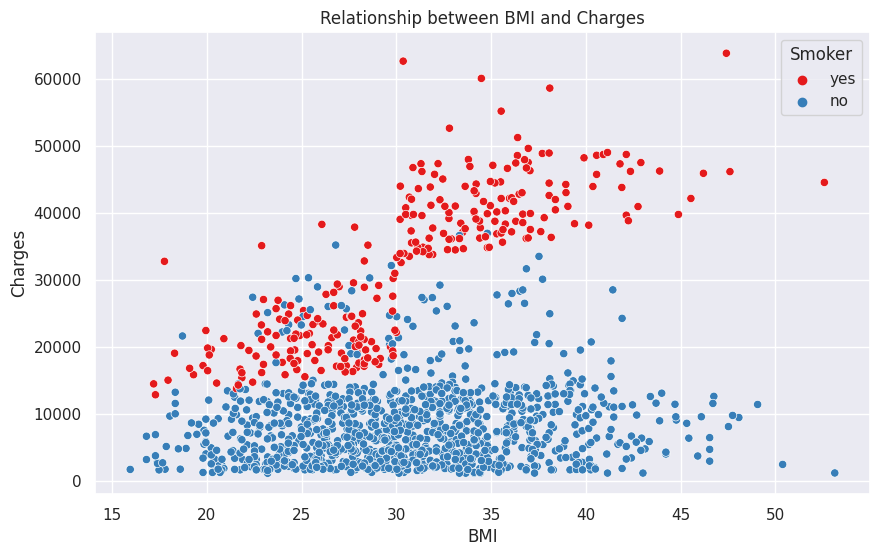

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set1')
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

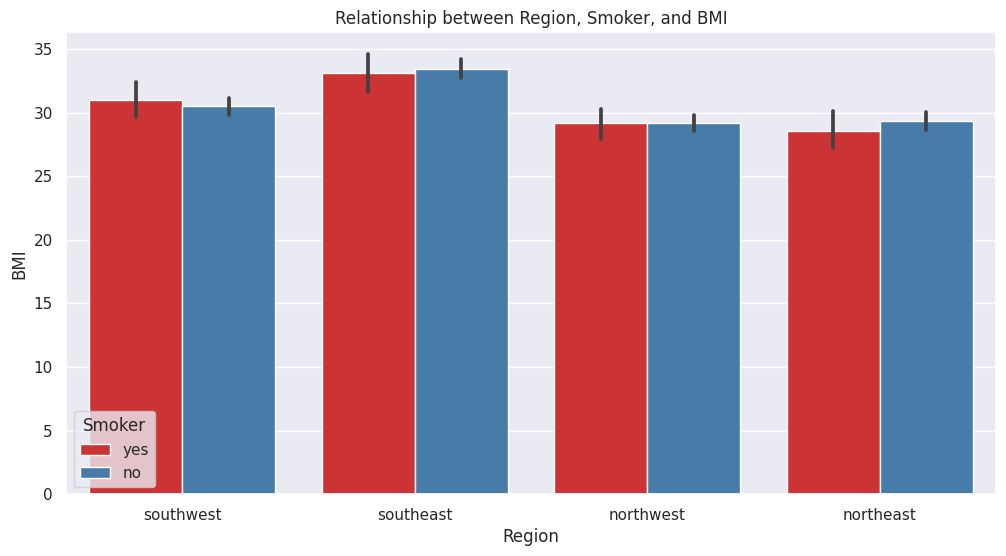

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='bmi', hue='smoker', palette='Set1')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# LABEL ENCODİNG & ONE HOT ENCODİNG İŞLEMLERİ

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols, True)

In [ ]:
 scaler = StandardScaler()
 df[num_cols] = scaler.fit_transform(df[num_cols])
 df[num_cols].head()

,age,bmi,charges
0,-1.4388,-0.4533,0.2986
1,-1.5100,0.5096,-0.9537
2,-0.7980,0.3833,-0.7287
3,-0.4419,-1.3055,0.7198
4,-0.5131,-0.2926,-0.7768


In [ ]:
def binary_cols(dataframe):
  binary_cols = []
  for col in dataframe.columns:
    if dataframe[col].dtype not in [int, float] and df[col].nunique() == 2:
      binary_cols.append(col)
  return binary_cols

In [ ]:
binary_cols = binary_cols(df)

In [ ]:
def label_encoder(dataframe, binary_cal):
  label_encoder = LabelEncoder()
  dataframe[binary_cal] = label_encoder.fit_transform(dataframe[binary_cal])
  return dataframe

In [ ]:
for col in binary_cols:
  label_encoder(df, col)

# Modelleme Aşaması

In [ ]:
y = df["charges"]      # Y = Bağımlı Değişken / Hedef Değişken
X = df.drop("charges", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=17)

In [ ]:
models = [("LR", LinearRegression()),
          ("KNN", KNeighborsRegressor()),
          ("CART", DecisionTreeRegressor()),
          ("RF", RandomForestRegressor()),
          ("GBM", GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective="reg:squarederror")),
          ("LightGBM", LGBMRegressor())]

In [ ]:
for name, regressor in models:
  rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring= "neg_mean_squared_error")))
  print(f"RMSE :  {round(rmse,4)} ({name})")

RMSE :  0.5022 (LR)
RMSE :  0.5732 (KNN)
RMSE :  0.5609 (CART)
RMSE :  0.4113 (RF)
RMSE :  0.379 (GBM)
RMSE :  0.4412 (XGBoost)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score -0.007277
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 0.004586
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

* RMSE :  0.5022 (LR)
* RMSE :  0.5732 (KNN)
* RMSE :  0.5687 (CART)
* RMSE :  0.4106 (RF)
* RMSE :  0.3785 (GBM)
* RMSE :  0.4412 (XGBoost)
* RMSE :  0.4012 (LightGBM)

# Hyper-parameter Optimization

In [ ]:
lgbm_param = {"learning_rate" : [0.01, 0.1],
              "n_estimators" : [500,1500],

              }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_param,
                            cv=3,
                            n_jobs = -1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 0.027024


In [ ]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X,y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring= "neg_mean_squared_error")))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1338, number of used features: 11
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score -0.007277
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the tra

In [ ]:
rmse

0.3858656229245101

* Hiper-Parametre Optimizasyonu Öncesi:
RMSE : 0.4012 (LightGBM)

* Hiper-Parametre Optimizasyonu Sonrası: RMSE : 0.3858 (LightGBM)

# Önem arz eden değişkenler

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value" : model.feature_importances_, "Feature" : features.columns })
  plt.figure(figsize= (20,20))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")

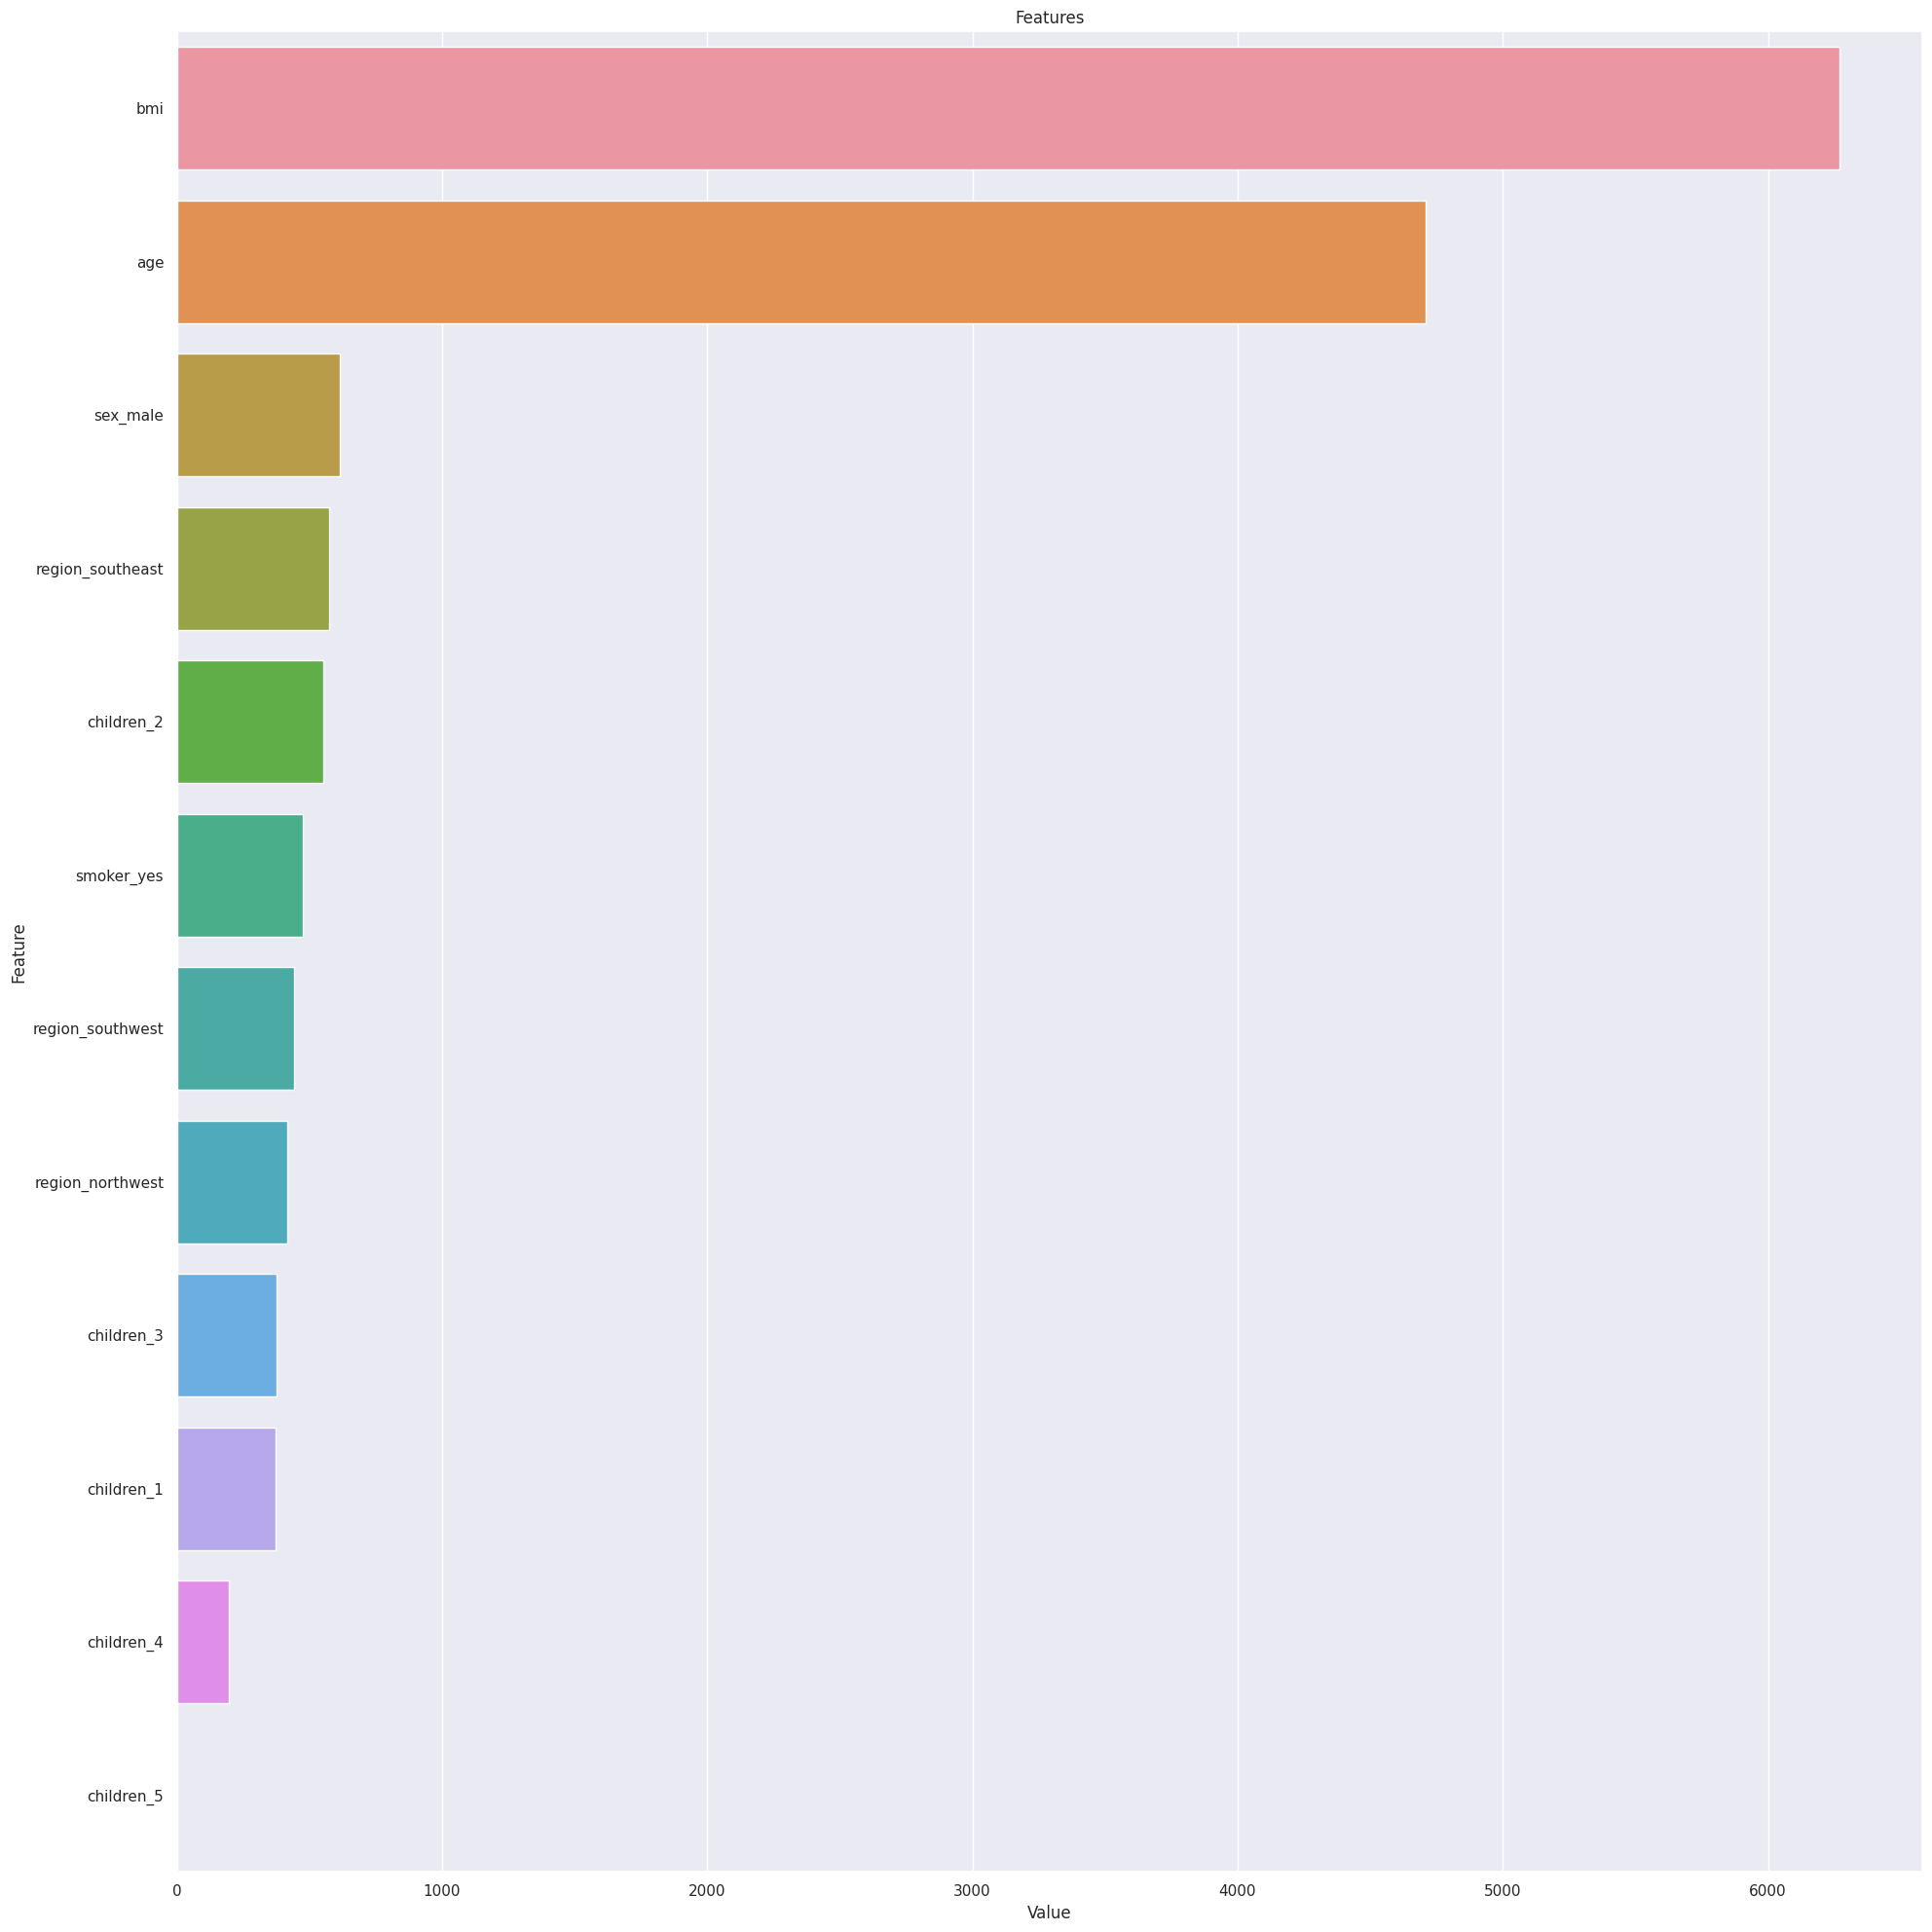

In [ ]:
plot_importance(final_model, X)